# Path (In)dependence
### Neshyba, 2021

### Path independence
The functions that we've been working with so far -- $U$, $H$, and $S$ -- are all what we call *State functions* (although it would be a sly joke on you if they weren't). But how do we *know* if a given function really is a state function, and not some path-dependent pretender? Your strategy for answer this should probably depend on how you are presented with the function.

1. If you are given an *algebraic representation* of the function, like $U=[{3 \over 2}RT + {na \over V}]n$, then we say it exists -- because there you have it.
1. If you are *shown a thermodynamic surface,* like $U(T,V)$ or $H(T,P)$, then we also say the function exists -- because you're looking at it.
1. If you are given a differential equation of state of a function that you know *should* exist, like $dU = C_V dT + \pi_T dV$, and you have confidence that $C_V$ and $\pi_T$ are good (as in, experimentally obtained), then we would also say that that particular $dU$ exists, because Thermodynamics is supposed to be self-consistent, and nature isn't supposed to lie.
1. If you are given a differential equation of state, like $dA = XdT + YdP$, and you don't know anything else about $A$, then you can perform a couple of tests. 

#### The cross-integration test
The idea here is, if a function is path-independent, then when we construct that surface by integrating its slopes, it won't matter what order we do the integration in. To be specific, say we're dealing with a $T,P$ state space. Then we could construct $A$ according to

$$
\Delta A = \int_{Initial \ State}^{Intermed \ State} XdT + \int_{Intermed \ State}^{Final \ State} YdP \ \ \ \ (1)
$$

and compare that to the *other* order of integration,

$$
\Delta A^\prime = \int_{Initial \ State}^{Intermed State'} YdP + \int_{Intermed State'}^{Final \ State} XdT \ \ \ \ (2)
$$

If $\Delta A$ looks the same as $\Delta A^\prime$, then the change in $A$ really is path-independent! We'd say $A(T,P)$ is a state function. 

#### The cross-derivative test
If $A$ really is a state function, then it must be the case that $X=\big (\partial A/ \partial T \big )_P$ and $Y=\big (\partial A/ \partial P \big )_T$. Those two are different quantities, of course. But ... what about *their* derivatives? Since multivariate differential calculus tells us that the order in which one takes partial derivatives is inconsequential, it follows that 

$$
\big (\partial X/ \partial P \big )_T = \big (\partial Y/ \partial T \big )_P \ \ \ \ (3)
$$

#### The task at hand
Suppose we have two candidate state functions, $A$ and $B$, defined by the differential equations of state

$$
dA = P dT + T dP \ \ \ \ (4)
$$

and

$$
dB = \frac 1 {T^2} dT + \frac 1 {TP} dP \ \ \ \ (5)
$$

One of these is path-independent, the other isn't. Which is the pretender? First, you'll apply a numerical cross-integration test. How? Using a Python function called Integrator, which is supplied to you! To be specific,

1. Construct $\Delta A$ numerically integrating the slopes *temperature-first*, followed by integrating over the pressure. 
1. Construct  $\Delta A^\prime$ numerically integrating the slopes *pressure-first,* then over temperature. 

If your $\Delta A$ looks like $\Delta A^\prime$, you would conclude that $A$ is indeed path-independent! If not, then $A$ is a pretender -- it's not a state function.

Then do the same with $B$.

As a post-CGI activity, you'll apply the cross-derivative test, this time using pen-and-paper calculus. Hopefully, your conclusions about whether $A$ is the pretender, or $B$, will be the same as what you got using the cross-integration test.


## Learning Goals
1. Explain various strategies for determining whether a given function is a *bona fide* thermodynamic state function. 
1. Use the cross-integration and cross-derivative tests to determine whether a given differential equation of state describes a state function.

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

### Creating the state space

In [2]:
# Lay out a T,P state space
Tgrid, Pgrid_bar = PL.Statespace([200,400,100],[1,10,101])
Pgrid = AssignQuantity(Pgrid_bar,'bar').to('pascal')
Tgrid = AssignQuantity(Tgrid,'K')

### Checking for path independence of $A$
Some hints:

- To simplify matters, we can leave off the last two arguments of PL.Integrator that specify the units and the standard state.
- The default for PL.Integrator is *temperature-first*. If you want to make it *pressure-first,* add "axis=1" at the end of the argument list. 

What this adds up to is something like

    A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity)
    
gets us a thermodynamic surface that results when we integrate over T first, then P. By contrast,

    A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)
    
integrates in the reverse order. Once you have these two surfaces, you could plot them and see if they look different from each other.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/home/instructor_chem340/chem340/source/Week_10b.PathIndependence/PchemLibrary.py:133: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y
/home/instructor_chem340/chem340/source/Week_10b.PathIndependence/PchemLibrary.py:142: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[:,i] = integral_along_x
/usr/local/lib/python3.6/dist-packages/numpy/lib/stride_tricks.py:257: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


Text(0.5, 0.92, 'A (P-first) (gas)')

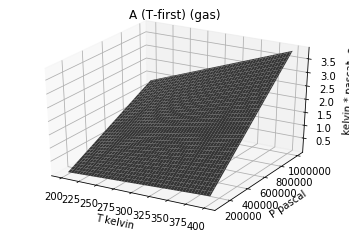

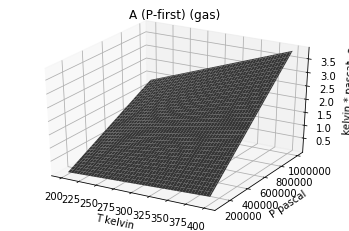

In [3]:
# Checking out A
### BEGIN SOLUTION

# Getting the slopes
dAdT = AssignQuantity(Pgrid,'pascal')
dAdP = AssignQuantity(Tgrid,'K')

# Integrating
A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity)
A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)

# Graphing
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax.plot_surface(Tgrid, Pgrid, A_Tfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Tfirst.units))
ax.set_title('A (T-first) (gas)')

ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax.plot_surface(Tgrid, Pgrid, A_Pfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Pfirst.units))
ax.set_title('A (P-first) (gas)')

### END SOLUTION

### Checking for path independence of $B$
Now do the same for $B$.

Text(0.5, 0.92, 'B (P-first) (gas)')

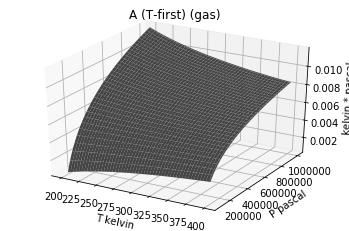

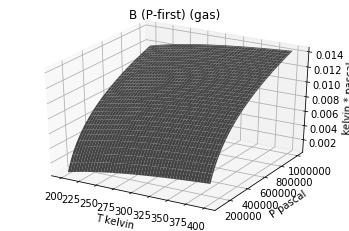

In [4]:
# Checking out B
### BEGIN SOLUTION

# Getting the slopes
dBdT = AssignQuantity(1/Tgrid**2,'K^-2')
dBdP = AssignQuantity(1/(Tgrid*Pgrid),'K^-1 pascal^-1')

# Integrating
B_Tfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity)
B_Pfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity, axis=1)

# Graphing
ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax.plot_surface(Tgrid, Pgrid, B_Tfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Tfirst.units))
ax.set_title('A (T-first) (gas)')

ax = plt.figure().gca(projection='3d') # Set up a three dimensional graphics window 
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
ax.plot_surface(Tgrid, Pgrid, B_Pfirst, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(A_Pfirst.units))
ax.set_title('B (P-first) (gas)')

### END SOLUTION

### Pause for analysis
With pen and paper, apply the cross-derivative test. Hopefully, you get the same result!

In the cell below, enter your conclusions about whether A or B is a state function, according to your numerical cross-integration test as well as your pen-and-paper cross-derivative test.

A is a state function, B is not